Single precision Alpha X Plus Y (SAXPY)

It's one of the basic function in Linear algebra.

It's a combination of scalar multiplication and vector addition:

**$Z = \alpha X+ Y  $**

Where:

 $X,Y, Z $ - vectors,

$\alpha$ - scalar


In [ ]:
import cupy as cp
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
cp.cuda.Device()

<CUDA Device 0>

**What is the difference between numpy and cupy?**

Cupy is a library that implements Numpy arrays on Nvidia GPUs using CUDA GPU library. This implementation achives superior concurrency acceleration because of the multitude of CUDA cores, that the GPU has.




**How does cupy handle data transfers between CPU and GPU?**

In [ ]:
x_cpu = np.array([3, 4, 5])
x_gpu = cp.asarray(x_cpu)  # move the data to the current device.

In [ ]:
x_gpu = cp.array([3, 4, 5])  # create an array in the current device
x_cpu = cp.asnumpy(x_gpu)  # move the array to the host.

In [ ]:
x_cpu = x_gpu.get()

Implementation

In [ ]:
@cp.fuse()
def np_saxpy(x, y, a):
    return x*a + y
    

In [ ]:
%timeit -n15 -r1 -o -q np_saxpy(np_x, np_y, np_a)

<TimeitResult : 185 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 15 loops each)>

In [ ]:
start = 1
end = 4
samples = 30

Numpy 


In [ ]:
np_results = []

for size in tqdm(np.logspace(start,end,samples)):
    size = int(size)
    np_x = np.random.rand(size,size).astype(np.float32)
    np_y = np.random.rand(size,size).astype(np.float32)
    np_a = np.float32(5.0)
    t = %timeit -n300 -r5 -o -q np_saxpy(np_x, np_y, np_a);
    np_results.append(t.best)
    

In [ ]:
np_results

[1.8663332836392026e-06,
 1.8449999818888803e-06,
 2.6749999960884453e-06,
 2.1749999723397193e-06,
 2.5469999915609755e-06,
 2.7096666356859106e-06,
 2.8376666402133804e-06,
 3.2543332781642674e-06,
 4.109333385713398e-06,
 5.145999991024534e-06,
 6.466333288699388e-06,
 9.33133337336282e-06,
 1.388933325263982e-05,
 2.082699997117743e-05,
 2.9442333325278014e-05,
 4.594700003508478e-05,
 7.027299997086327e-05,
 0.0005769663333194331,
 0.0010392413332980747,
 0.0017729326666449197,
 0.0027439039999929567,
 0.004471339333395008,
 0.0071181610000591415,
 0.011429910666677945,
 0.01813472333335085,
 0.02906811233338279,
 0.044830478666699494,
 0.07184886100003496,
 0.11422304666669031,
 0.18412127166666323]

In [ ]:
cp_results = []

for size in tqdm(np.logspace(start,end,samples)):
    size = int(size)
    cp_x = cp.random.rand(size,size).astype(cp.float32)
    cp_y = cp.random.rand(size,size).astype(cp.float32)
    cp_a = cp.float32(5)
    t = %timeit -n300 -r5 -o -q np_saxpy(cp_x, cp_y, cp_a);
    cp_results.append(t.best)

In [ ]:
cp_results

[1.694700001583745e-05,
 1.6085333287871134e-05,
 1.5684000002996377e-05,
 1.6281666660991807e-05,
 1.5595666676138837e-05,
 1.586066665671145e-05,
 1.6339000042838356e-05,
 1.5594999907383075e-05,
 1.5532666681489595e-05,
 1.5891000026992213e-05,
 1.6199333282808464e-05,
 1.6052333327631157e-05,
 1.6145000020818164e-05,
 1.6540333357018728e-05,
 1.6381000071608773e-05,
 1.6309000008429092e-05,
 1.598866666123892e-05,
 1.6112333299436916e-05,
 1.6163666635596504e-05,
 1.6300333275770147e-05,
 1.626400005382796e-05,
 1.718900001530225e-05,
 1.6646000052181383e-05,
 3.4528333344496787e-05,
 9.930200001690537e-05,
 0.00014593333326047287,
 0.00025863966662048675,
 0.00041342899998805176,
 0.0006614946666134832,
 0.001040744666631023]

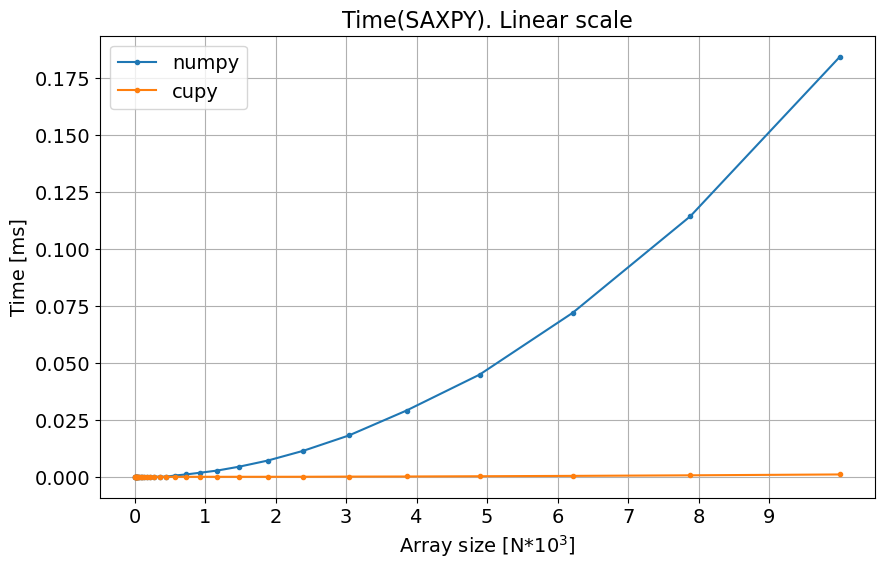

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(10,6))

plt.plot(np.logspace(start, end, samples)/1000,  np_results,".-")
plt.plot(np.logspace(start, end, samples)/1000,  cp_results,".-")
plt.title('Time(SAXPY). Linear scale', fontsize=16)
plt.xlabel('Array size [N$*10^3$]', fontsize=14)
plt.ylabel('Time [ms]', fontsize=14)
plt.xticks(np.arange(0, 10, step=1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

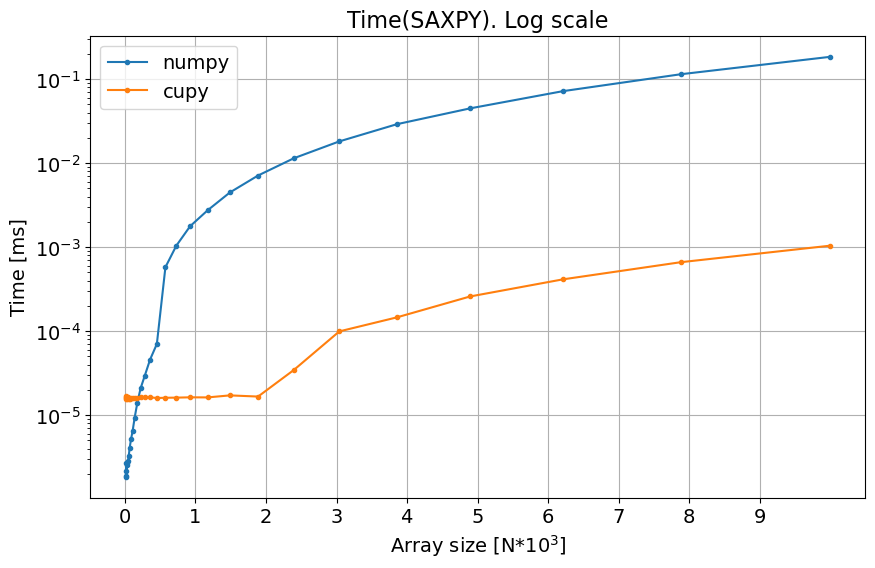

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.logspace(start, end, samples)/1000, np_results, ".-")
plt.plot(np.logspace(start, end, samples)/1000, cp_results, ".-")

plt.title('Time(SAXPY). Log scale', fontsize=16)
plt.yscale('log')
plt.xticks(np.arange(0, 10, step=1))
plt.xlabel('Array size [N$*10^3$]', fontsize=14)
plt.ylabel('Time [ms]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

In [ ]:
!pip install shapely

touch point :  [174.33288222]


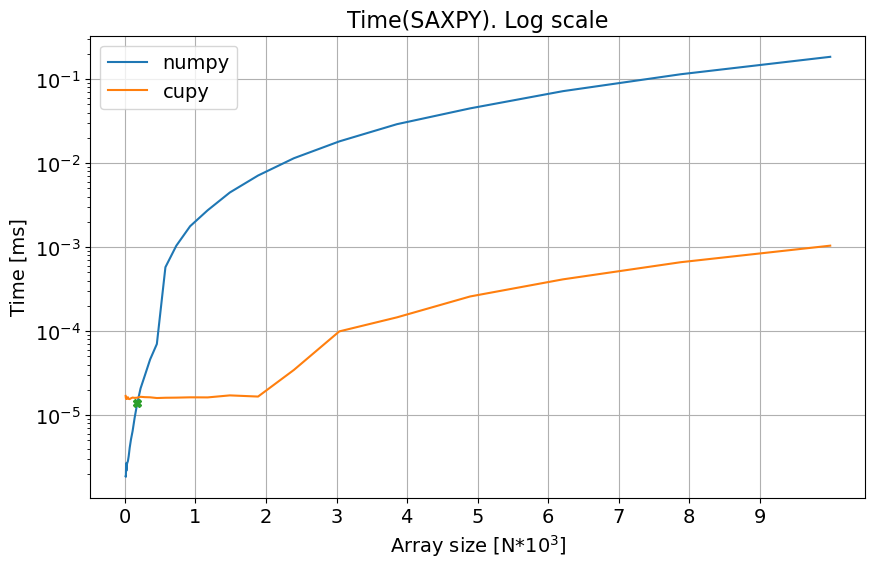

In [ ]:

x=np.logspace(start, end, samples)/1000
y1 = np.array(np_results)
y2= np.array(cp_results)

plt.figure(figsize=(10,6))
plt.plot(x, y1)
plt.plot(x, y2)

idx = np.argwhere(np.diff(np.sign(y1-y2))).flatten()
plt.plot(x[idx], y1[idx], "X")
print('touch point : ',x[idx]*1000)

plt.title('Time(SAXPY). Log scale', fontsize=16)
plt.yscale('log')
plt.xticks(np.arange(0, 10, step=1))
plt.xlabel('Array size [N$*10^3$]', fontsize=14)
plt.ylabel('Time [ms]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

In [ ]:
start = 1
end = 15000
samples = 35

In [ ]:
np_results = []

for size in tqdm(np.linspace(start,end,samples)):
    size = int(size)
    np_x = np.random.rand(size,size).astype(np.float32)
    np_y = np.random.rand(size,size).astype(np.float32)
    np_a = np.float32(5.0)
    t = %timeit -n300 -r5 -o -q np_saxpy(np_x, np_y, np_a);
    np_results.append(t.best)
    
    
cp_results = []

for size in tqdm(np.linspace(start,end,samples)):
    size = int(size)
    cp_x = cp.random.rand(size,size).astype(cp.float32)
    cp_y = cp.random.rand(size,size).astype(cp.float32)
    cp_a = cp.float32(5)
    t = %timeit -n300 -r5 -o -q np_saxpy(cp_x, cp_y, cp_a);
    cp_results.append(t.best)

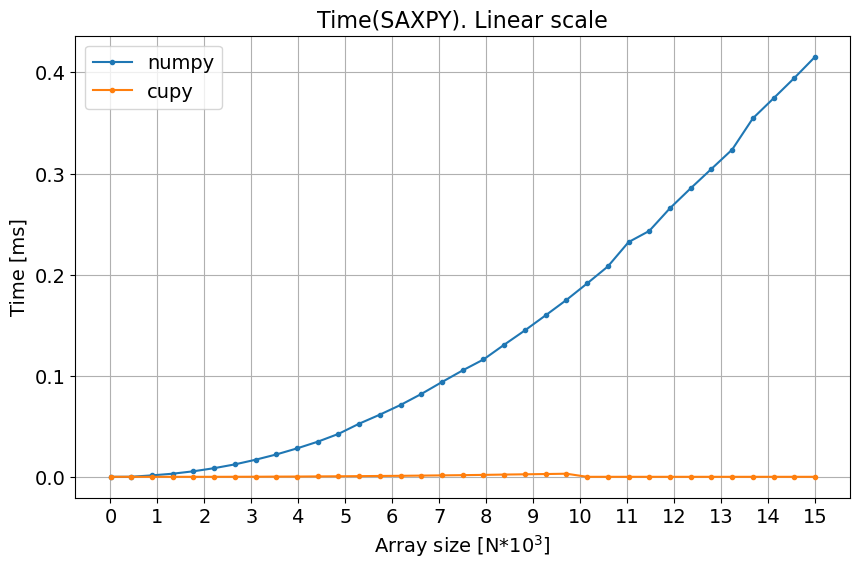

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(10,6))

plt.plot(np.linspace(start, end, samples)/1000,  np_results,".-")
plt.plot(np.linspace(start, end, samples)/1000,  cp_results,".-")
plt.title('Time(SAXPY). Linear scale', fontsize=16)
plt.xlabel('Array size [N$*10^3$]', fontsize=14)
plt.ylabel('Time [ms]', fontsize=14)
plt.xticks(np.arange(0, 16, step=1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

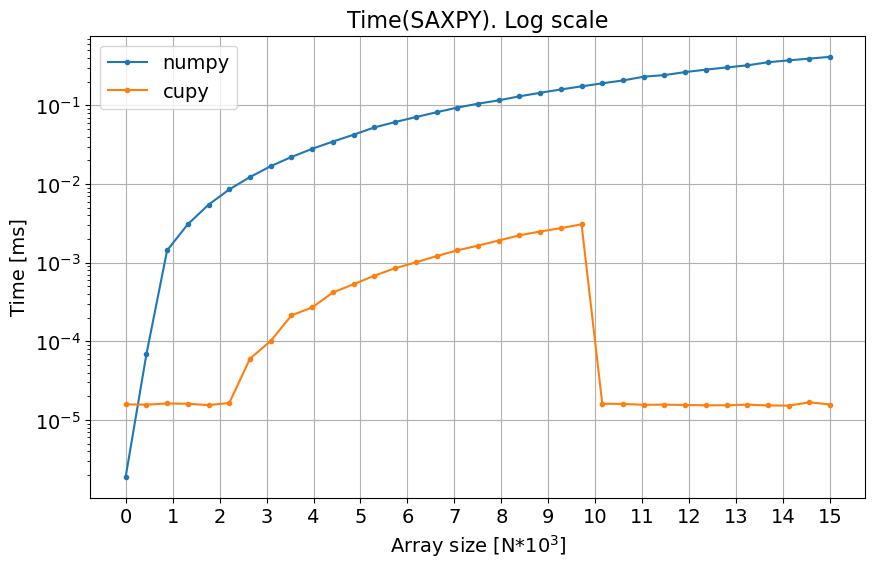

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(start, end, samples)/1000, np_results, ".-")
plt.plot(np.linspace(start, end, samples)/1000, cp_results, ".-")

plt.title('Time(SAXPY). Log scale', fontsize=16)
plt.yscale('log')
plt.xticks(np.arange(0, 16, step=1))
plt.xlabel('Array size [N$*10^3$]', fontsize=14)
plt.ylabel('Time [ms]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

In [ ]:
np.savez('data', np_results, cp_results)